# Librerias y funciones previas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Por último, definimos las funciones de Impermanent Loss como % y en USD, en términos de $R=\frac{P}{P_0}$ y de $P$, dadas por

\begin{align*}
  IL_{\%}(R) &= \frac{2\sqrt{R}}{R+1} -1 \Rightarrow IL_{USD}(R) = IL_{\%}(R)*V_{Hold};\\
  IL_{\%}(P) &= 2\sqrt{P_0}\frac{\sqrt{P}}{P+P_0}-1 \Rightarrow IL_{USD}(P) = IL_{\%}(P)*V_{Hold};\\ 
\end{align*}

Hay otra escritura posible para $IL_{USD}(P)$ que sale usando

\begin{align*}
  V_P &= 2\sqrt{kP} = 2\sqrt{kP_0}\sqrt{\frac{P}{P_0}} = V_P^0\sqrt{\frac{P}{P_0}},\\
  V_H &= \sqrt{kP_0}\left(\frac{P}{P_0}+1\right) = 2\sqrt{kP_0}\frac{1}{2}\left(\frac{P}{P_0}+1\right)=\frac{V_H^0}{2}\left(\frac{P}{P_0}+1\right).
\end{align*}

Notar que en las últimas identidades estamos usando $k(t)=k(0)$, que podría no ser cierto (Ver sección ¿Es lo mismo calcular IL como la diferencia entre V_P y V_H que tomar las formulas? NO!).

Nos queda entonces

$$IL_{USD}(P) = V_P - V_H = V_H^0\left(\sqrt{\frac{P}{P_0}}-\frac{1}{2}-\frac{P}{2P_0}\right).$$

In [46]:
def OutGivenIn(balance, A_i, i):
  '''
  P_ETH = balance[0] / balance[1]
  i = 0 quiere decir que meto USDC
  '''
  B_i = balance[i]
  B_o = balance[i-1]
  # if i==0:
  #   B_i = balance[0]
  #   B_o = balance[1]
  # else:
  #   B_i = balance[1]
  #   B_o = balance[0]
  A_o = B_o * (1-B_i/(B_i+A_i))
  return A_o

def InGivenOut(balance, A_o, i):
  B_i = balance[i]
  B_o = balance[i-1]
  # if i==0:
  #   B_i = balance[0]
  #   B_o = balance[1]
  # else:
  #   B_i = balance[1]
  #   B_o = balance[0]
  A_i = B_i * (B_o/(B_o-A_o)-1)
  return A_i 

def InGivenPrice(balance, P_new, i):
  P_pool = balance[0] / balance[1]
  B_i = balance[i]
  # if i==0:
  #   B_i = balance[0]
  #   B_o = balance[1]
  # else:
  #   B_i = balance[1]
  #   B_o = balance[0]
  A_i = B_i * ((P_new/P_pool)**(1/2)-1)
  return A_i

Por último, definimos las funciones de Impermanent Loss como % y en USD, en términos de $R=\frac{P}{P_0}$ y de $P$, dadas por

\begin{align*}
  IL_{\%}(R) &= \frac{2\sqrt{R}}{R+1} -1 \Rightarrow IL_{USD}(R) = IL_{\%}(R)*V_{Hold};\\
  IL_{\%}(P) &= 2\sqrt{P_0}\frac{\sqrt{P}}{P+P_0}-1 \Rightarrow IL_{USD}(P) = IL_{\%}(P)*V_{Hold};\\ 
\end{align*}

Hay otra escritura posible para $IL_{USD}(P)$ que sale usando

\begin{align*}
  V_P &= 2\sqrt{kP} = 2\sqrt{kP_0}\sqrt{\frac{P}{P_0}} = V_P^0\sqrt{\frac{P}{P_0}},\\
  V_H &= \sqrt{kP_0}\left(\frac{P}{P_0}+1\right) = 2\sqrt{kP_0}\frac{1}{2}\left(\frac{P}{P_0}+1\right)=\frac{V_H^0}{2}\left(\frac{P}{P_0}+1\right).
\end{align*}

Notar que en las últimas identidades estamos usando $k(t)=k(0)$, que podría no ser cierto (Ver sección ¿Es lo mismo calcular IL como la diferencia entre V_P y V_H que tomar las formulas? NO!).

Nos queda entonces

$$IL_{USD}(P) = V_P - V_H = V_H^0\left(\sqrt{\frac{P}{P_0}}-\frac{1}{2}-\frac{P}{2P_0}\right).$$

In [5]:
def IL_R(R):
  return 2 * R**(1/2)/(R+1)-1
def IL_P(P):
  # return IL_R(P/P_entry)
  return 2 * (P_entry)**(1/2) * P**(1/2)/(P+P_entry)-1
def IL_R_in_usd(R):
  P = R * P_entry
  V_hold = tenencias_inicial[0] + tenencias_inicial[1] * P
  return IL_R(R) * V_hold
def IL_P_in_usd(P):
  V_hold = tenencias_inicial[0] + tenencias_inicial[1] * P
  # V_hold_0 = tenencias_inicial[0] + tenencias_inicial[1] * P_entry
  # return IL_R_in_usd(P/P_entry)
  return IL_P(P) * V_hold
  # return V_hold_0 * ((P/P_entry)**(1/2) - 1/2 - P/(2*P_entry))


Podemos entonces calcular la derivada de IL

\begin{align*}
  \frac{\partial}{\partial R}IL_{\%}(R) &= \frac{1-R}{\sqrt{R}(R+1)^2}; \
  \frac{\partial}{\partial P}IL_{\%}(P) = \sqrt{P_0}\frac{P_0-P}{\sqrt{P}(P+P_0)^2} \\ 
  \Rightarrow \frac{\partial}{\partial P}IL_{USD}(P) &= \frac{\partial}{\partial P}IL_{\%}(P) * V_{Hold} + IL_{\%}(P) * \frac{\partial}{\partial P}V_{Hold}\\
  &= \frac{\partial}{\partial P}IL_{\%}(P) * V_{Hold} + IL_{\%}(P) * b,
\end{align*}
donde en la última identidad usamod $V_{Hold} = tenencias\_inicial[0] + tenencias\_inicial[1] * P =: a + b*P$.

Equivalentemente, si usamos $$IL_{USD}(P) = V_P - V_H = V_H^0\left(\sqrt{\frac{P}{P_0}}-\frac{1}{2}-\frac{P}{2P_0}\right),$$
nos queda
$$\frac{\partial}{\partial P}IL_{USD}(P) = \frac{V^0_H}{2P_0}\left(\sqrt{\frac{P_0}{P}}-1\right).$$

In [6]:
#
def IL_derivada_R(R):
  return (1-R) / (R**(1/2)*(R+1)**2)
def IL_derivada_P(P):
  return IL_derivada_R(P/P_entry) / P_entry
  # return (P_entry)**(1/2)*(P_entry-P)/(P**(1/2)*(P+P_entry)**2)
def IL_derivada_P_in_usd(P):
  V_hold = tenencias_inicial[0] + tenencias_inicial[1] * P
  V_hold_0 = tenencias_inicial[0] + tenencias_inicial[1] * P_entry
  return IL_derivada_P(P) * V_hold + IL_P(P) * tenencias_inicial[1]
  # return V_hold_0/(2*P_entry) * ((P_entry/P)**(1/2) - 1)

Agregamos también las fórmulas incorporando fees. Sean $fee=\tau$, $\phi = 1-\tau$, $P:=p^{bid^1}$ y $P_0:=p^{bid^0}$. Sabiendo que $p^b = \phi P_{Y|X} = \phi \frac{y}{x}$, $R=\frac{P_{Y|X}}{P^0_{Y|X}}=\frac{p^b}{p^b_0}$ y que $V_{Hold} = a+b*p^b$, tenemos

\begin{align*}
  IL^{fee}_{\%}(R) &= \sqrt{R}\frac{1+\phi}{\phi R+1} -1 \Rightarrow \frac{\partial}{\partial R}IL^{fee}_{\%}(R) = \frac{1+\phi}{(1+\phi R)^2}\frac{1-\phi R}{2\sqrt{R}};\\
  IL^{fee}_{\%}(P) &= \sqrt{PP_0}\frac{1+\phi}{P_0+\phi P}-1 \Rightarrow \frac{\partial}{\partial P} IL^{fee}_{\%}(P) = \frac{1+\phi}{2}\sqrt{\frac{P_0}{P}}\frac{P_0-\phi P}{(P_0+\phi P)^2};\\ 
  IL^{fee}_{USD}(P) &= IL^{fee}_{\%}(P)*V_{Hold} \text{ una forma} \\
  &= \frac{V_H^0}{2}\left(\sqrt{\frac{P}{P_0}}\frac{1+\phi}{\phi}-\frac{P_0+\phi P}{P_0\sqrt{\phi}}\right) \text{ otra forma} \Rightarrow \frac{\partial}{\partial P} IL^{fee}_{USD}(P) = \frac{V_H^0}{2P_0}\left(\frac{1}{2}\sqrt{\frac{P_0}{P}}\frac{1+\phi}{\phi}-\sqrt{\phi}\right).
\end{align*}

In [7]:
def IL_R_fee(R,fee):
  phi = 1-fee
  return R**(1/2)*(1+phi)/(1+R*phi)-1
def IL_P_fee(P,fee):
  phi = 1-fee
  return IL_R_fee(P/P_entry,fee)
  # return (P*P_entry)**(1/2)*(1+phi)/(P_entry+phi*P)-1
def IL_P_in_usd_fee(P,fee):
  phi = 1-fee
  # P = R * P_entry
  p_bid = P * phi
  p_bid_entry = P_entry * phi
  # p_bid_entry = P_entry * phi
  V_hold = tenencias_inicial[0] + tenencias_inicial[1] * p_bid
  V_hold_0 = tenencias_inicial[0] + tenencias_inicial[1] * p_bid_entry
  return V_hold_0/2 * ( (p_bid/p_bid_entry)**(1/2) * (1+phi)/phi - (p_bid_entry + phi*p_bid) / (p_bid_entry*phi**(1/2)) )
  # return IL_R_in_usd_fee(P/P_entry,fee)
#
def IL_derivada_R_fee(R, fee):
  phi = 1-fee
  return (1+phi)/(1+phi*R)**2 * (1-phi*R)/(2*R**(1/2))
def IL_derivada_P_fee(P,fee):
  phi = 1-fee
  p_bid_entry = P_entry * phi
  p_bid = P *  phi
  return IL_derivada_R_fee(P/P_entry, fee) / p_bid_entry
  # return (1+phi)/2 * (p_bid_entry/p_bid)**(1/2) * (p_bid_entry-phi*p_bid)/(p_bid_entry+phi*p_bid)**2
def IL_derivada_P_in_usd_fee(P,fee):
  phi = 1-fee
  p_bid = P * phi
  p_bid_entry = P_entry * phi
  V_hold = tenencias_inicial[0] + tenencias_inicial[1] * p_bid
  V_hold_0 = tenencias_inicial[0] + tenencias_inicial[1] * p_bid_entry
  return IL_derivada_P_fee(P,fee) * V_hold + IL_P_fee(P, fee) * tenencias_inicial[1] 
  # return V_hold_0/(2*p_bid_entry) * ( 1/2*(p_bid_entry/p_bid)**(1/2) * (1+phi)/phi - phi**(1/2) )

Hacemos algunos plots para chequear que todas las formulaciones son, al menos graficamente, equivalentes.

In [8]:
R_minus = np.arange(0.01, 1, 0.01)
R_plus = np.arange(1, 10, 0.01)

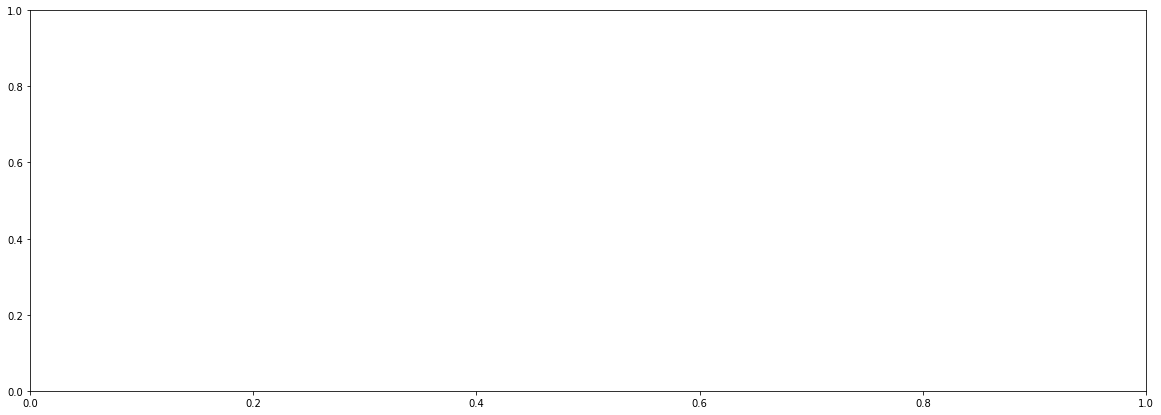

In [9]:
fig, axs = plt.subplots(1,1,figsize = (20,7))
# axs.plot(R_minus, IL_R(R_minus), c='red')
# axs.plot(R_plus, IL_R(R_plus), c='blue')
# axs.plot(R_minus*P_entry, IL_P(R_minus*P_entry), c='red')
# axs.plot(R_plus*P_entry, IL_P(R_plus*P_entry), c='blue')
# axs.plot(R_minus, IL_R_in_usd(R_minus), c='red')
# axs.plot(R_plus, IL_R_in_usd(R_plus), c='blue')
# axs.plot(R_minus*P_entry, IL_P_in_usd(R_minus*P_entry), c='red')
# axs.plot(R_plus*P_entry, IL_P_in_usd(R_plus*P_entry), c='blue')
# with fees
# fee = 0.00075
# axs.plot(R_minus, IL_R_fee(R_minus, fee), c='red')
# axs.plot(R_plus, IL_R_fee(R_plus, fee), c='blue')
# axs.plot(R_minus*P_entry, IL_P_fee(R_minus*P_entry, fee), c='red')
# axs.plot(R_plus*P_entry, IL_P_fee(R_plus*P_entry, fee), c='blue')
# axs.plot(R_minus*P_entry, IL_P_in_usd_fee(R_minus*P_entry, fee), c='red')
# axs.plot(R_plus*P_entry, IL_P_in_usd_fee(R_plus*P_entry, fee), c='blue')

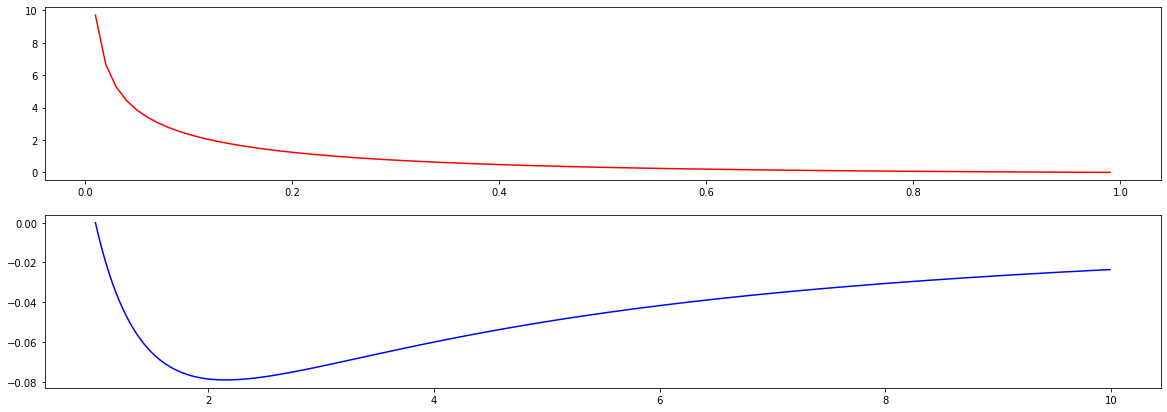

In [10]:
fig, axs = plt.subplots(2,1,figsize = (20,7))
axs[0].plot(R_minus, IL_derivada_R(R_minus), c='red')
axs[1].plot(R_plus, IL_derivada_R(R_plus), c='blue')
# axs[0].plot(R_minus*P_entry, IL_derivada_P(R_minus*P_entry), c='red')
# axs[1].plot(R_plus*P_entry, IL_derivada_P(R_plus*P_entry), c='blue')
# axs[0].plot(R_minus*P_entry, IL_derivada_P_in_usd(R_minus*P_entry), c='red')
# axs[1].plot(R_plus*P_entry, IL_derivada_P_in_usd(R_plus*P_entry), c='blue')
# with fees
# fee = 0.00075
# axs[0].plot(R_minus, IL_derivada_R_fee(R_minus, fee), c='red')
# axs[1].plot(R_plus, IL_derivada_R_fee(R_plus, fee), c='blue')
# axs[0].plot(R_minus*P_entry, IL_derivada_P_fee(R_minus*P_entry, fee), c='red')
# axs[1].plot(R_plus*P_entry, IL_derivada_P_fee(R_plus*P_entry, fee), c='blue')
# axs[0].plot(R_minus*P_entry, IL_derivada_P_in_usd_fee(R_minus*P_entry, fee), c='red')
# axs[1].plot(R_plus*P_entry, IL_derivada_P_in_usd_fee(R_plus*P_entry, fee), c='blue')

# Traigo datos historicos de ETH

In [53]:
!pip install python-binance

In [54]:
import pandas as pd
import math
import os.path
import time
from binance.client import Client
from datetime import timedelta, datetime
from dateutil import parser
from tqdm import tqdm_notebook #(Optional, used for progress-bars)

### API
binance_api_key = '9zFIgetckRO80d4RciWs8jc4XSwAMEnFIuwVhAoaYIstQ9RWlfqiV6zcAGu0Ta8R'    #Enter your own API-key here
binance_api_secret = 'Uu8vtNEmH1PPDPDchX51jivxBENEbNwDmDcQrnhPJBJwFcbqjnvxL2MeQJuTc4Kg' #Enter your own API-secret here

### CONSTANTS
binsizes = {"1m": 1, "5m": 5, "10m": 10, "15m": 15, "1h": 60, "6h": 360, "12h": 720, "1d": 1440}

batch_size = 750
binance_client = Client(api_key=binance_api_key, api_secret=binance_api_secret)

# initial_date = '1 Jan 2017'
initial_date = '31 Mar 2021'
### FUNCTIONS
def minutes_of_new_data(symbol, kline_size, data, source):
    if len(data) > 0:  old = parser.parse(data["timestamp"].iloc[-1])
    elif source == "binance": old = datetime.strptime(initial_date, '%d %b %Y')
    if source == "binance": new = pd.to_datetime(binance_client.get_klines(symbol=symbol, interval=kline_size)[-1][0], unit='ms')
    return old, new

def get_all_binance(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "binance")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    if oldest_point == datetime.strptime(initial_date, '%d %b %Y'): print('Downloading all available %s data for %s. Be patient..!' % (kline_size, symbol))
    else: print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data.' % (delta_min, symbol, available_data, kline_size))
    klines = binance_client.get_historical_klines(symbol, kline_size, oldest_point.strftime("%d %b %Y %H:%M:%S"), newest_point.strftime("%d %b %Y %H:%M:%S"))
    data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
    if len(data_df) > 0:
        temp_df = pd.DataFrame(data)
        data_df = data_df.append(temp_df)
    else: data_df = data
    data_df.set_index('timestamp', inplace=True)
    if save: data_df.to_csv(filename)
    print('All caught up..!')
    return data_df


Nos quedamos con datos históricos para ETHUSDC con frecuencia de 5m.

In [55]:
# lista = ["ETHUSDC"]

# BTC ETH MATIC UNI COMP AAVE YFI CRV MKR LINK KP3R SFI SUSHI 1INCH CAKE 
symbol = "ETHUSDC"
# Frecuencia: 1m, 5m, 10m, 15m, 1h, 1d, 1m
freq = "5m"

# Descarga de datos
ETH_historico = get_all_binance(symbol, freq, save = True)

All caught up..!


In [56]:
ETH_historico

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2021-03-31 00:00:00,1841.29,1845.35,1841.12,1845.35,13.4565,1617149099999,24811.47622,39,4.46207,8228.108687,0
2021-03-31 00:05:00,1844.39,1847.08,1843.99,1846.29,54.69818,1617149399999,100898.416,50,18.71127,34521.301061,0
2021-03-31 00:10:00,1845.54,1849.53,1845.54,1848.96,10.56434,1617149699999,19523.841834,31,6.35202,11739.724326,0
2021-03-31 00:15:00,1848.96,1850.35,1847.5,1847.5,126.93107,1617149999999,234808.651352,117,70.3571,130155.068172,0
2021-03-31 00:20:00,1848.12,1849.12,1846.0,1846.0,16.03979,1617150299999,29631.683226,61,3.04496,5630.118179,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-14 09:45:00,1083.89000000,1084.89000000,1082.53000000,1084.22000000,139.23340000,1657792199999,150921.62080500,183,57.13520000,61928.74414400,0
2022-07-14 09:50:00,1084.38000000,1086.32000000,1083.63000000,1086.32000000,104.85890000,1657792499999,113780.55680200,171,54.57720000,59219.31778100,0
2022-07-14 09:55:00,1086.36000000,1088.39000000,1085.37000000,1088.39000000,217.11120000,1657792799999,236028.30511000,256,78.52470000,85329.33788500,0


# Datos

In [57]:
P_ETH = ETH_historico[:2000]['close']
for i in range(len(P_ETH)):
  P_ETH[i] = float(P_ETH[i])

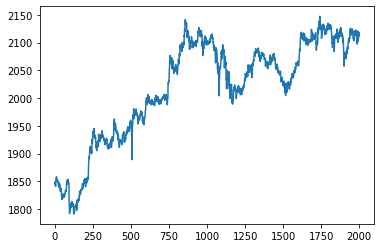

In [58]:
plt.plot(list(P_ETH))
# plt.figsize(20,7)

A continuación, vamos a suponer que entramos al pool al precio inicial de los datos históricos, P_ETH[0], y con un balance de 50000 ETH y la correspondiente cantidad (equivalente, 50% de peso de cada token) en USDC.

Además, utilizando las funciones new_balance y variacion_balances vamos a calcular cómo iría variando el balance del pool si este cambiara cada vez que se actualiza el precio de mercado (5m).

Notar que en la vida real los balances no tienen por qué cambiar cada vez que el precio de mercado cambia, sino que lo hará cuando los arbitradores consideren que el gap entre P_pool y P_new justifica el esfuerzo.

In [59]:
P_entry = P_ETH[0]
balance_inicial = [P_entry*50000, 50000]
nuevos_balances = [balance_inicial]
variacion_balance_pcg = [[0,0]]
variacion_balance_unidades = [[0,0]]
for i in range(1,len(P_ETH)):
  P = P_ETH[i]
  nuevos_balances.append(new_balance(P, nuevos_balances[i-1]))
  variacion_balance_pcg.append(variacion_balances(nuevos_balances[i], nuevos_balances[i-1])['pcg'])
  variacion_balance_unidades.append(variacion_balances(nuevos_balances[i], nuevos_balances[i-1])['unidades'])

# Estrategias de hedging  Opciones

Los futuros son un instrumento tipico para hedgearse contra movimientos de precio, el problema es que ofrecen protección lineal pero la IL tiene un comportamiento no lineal bidireccional.

Es por eso que las opciones son un mejor instrumento, como veremos a continuación.

El problema con las opciones es que tienen un costo y la estrategia puede dejar de ser rentable si no se estudia cuidadosamente la cantidad de opciones y el rebalanceo necesarios.

In [2]:
def call(P,K):
  return max(P-K, 0)
def put(P,K):
  return max(K-P, 0)

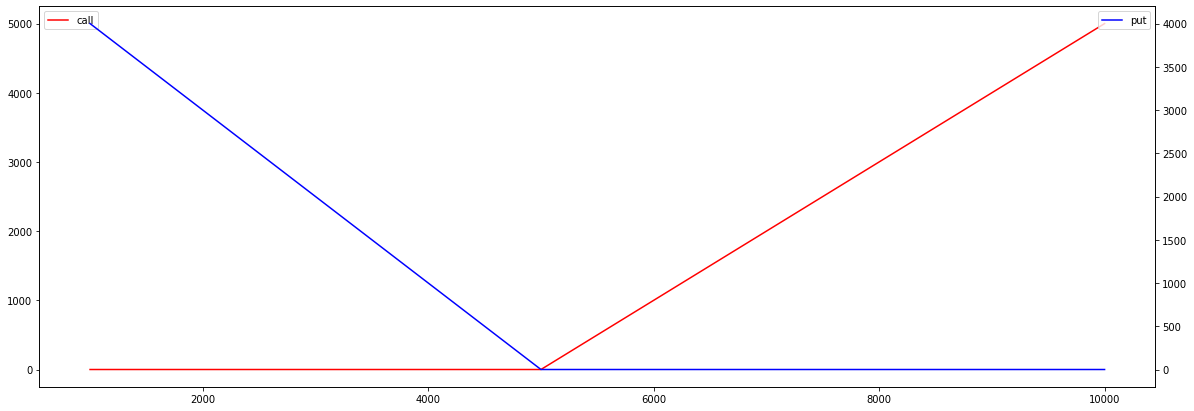

In [11]:
P = np.linspace(1000, 10000, 1000)
K = 5000
fig, axs = plt.subplots(1,1,figsize = (20,7))
axs.plot(P, [call(p,K) for p in P], c = 'red', label = 'call')
axs.legend(loc = 'upper left')
axs_ = axs.twinx()
axs_.plot(P,  [put(p,K) for p in P], c = 'blue', label = 'put')
axs_.legend(loc = 'upper right')

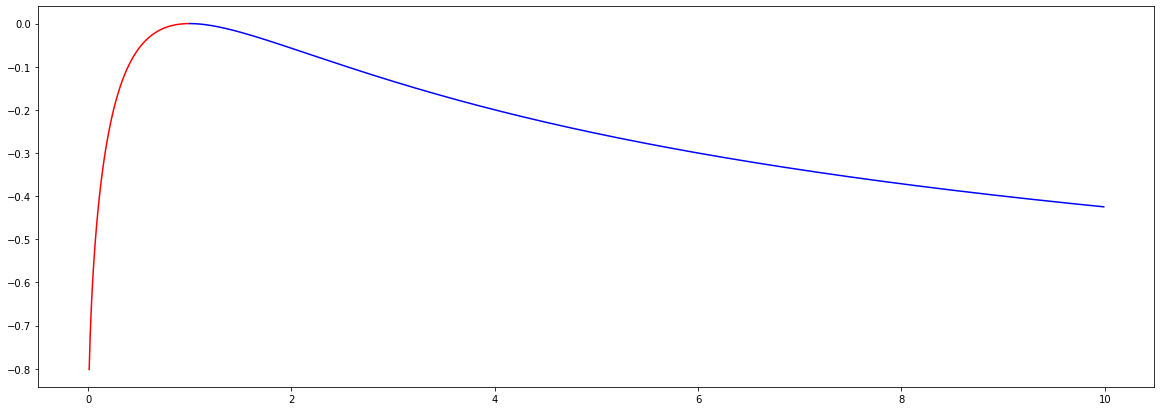

In [13]:
fig, axs = plt.subplots(1,1,figsize = (20,7))
axs.plot(R_minus, IL_R(R_minus), c='red')
axs.plot(R_plus, IL_R(R_plus), c='blue')


### Idea 1: Hedging con 1 conjunto de Calls y Puts



Con una estrategia conocida como Long Strangle, que consiste de holdear un call y un put sobre el mismo activo pero con diferentes strike prices, podemos hedgear la IL hasta cierto punto.


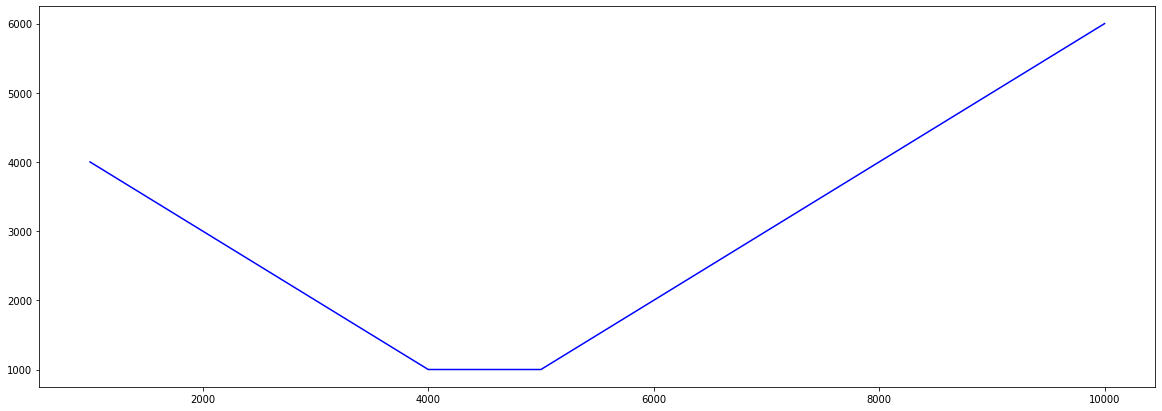

In [14]:

def long_strangle(P,K_call, K_put):
  return max(P-K_call,0) +  max(K_put-P,0)

P = np.linspace(1000, 10000, 1000)
K_call = 4000
K_put = 5000
fig, axs = plt.subplots(1,1,figsize = (20,7))
# axs.plot(P, [call(p,K_call)+put(p,K_put) for p in P], c = 'blue', label = 'long strangle')
axs.plot(P, [long_strangle(p,K_call,K_put) for p in P], c = 'blue', label = 'long strangle')



Supongamos que tenemos un pool wETH-USDC con $40000$ USDC y $100$ wETH por un valor total de $80000$, es decir, $P_{ETH} = 400$ USDC. La constante $k = 40000*100=4000000$.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Price change,-100.0%,-80.0%,-60.0%,-40.0%,-20.0%,-0.0%,20.0%,40.0%,60.0%,80.0%,100.0%,120.0%,140.0%,160.0%,180.0%
R,0.0%,20.0%,40.0%,60.0%,80.0%,100.0%,120.0%,140.0%,160.0%,180.0%,200.0%,220.0%,240.0%,260.0%,280.0%
IL ratio,100.0%,30.0%,10.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,10.0%,10.0%,10.0%,10.0%,10.0%


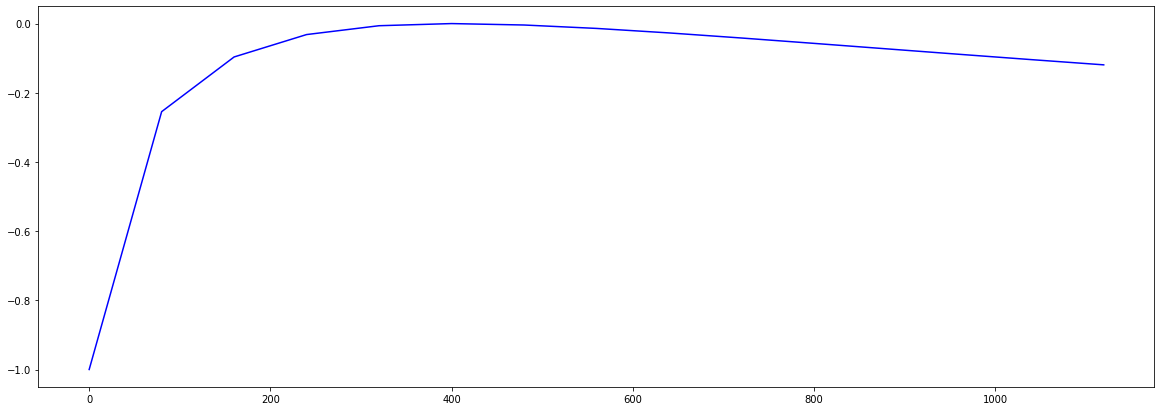

In [15]:

balance_usdc = 40000
balance_eth = 100
P_eth_0 = balance_usdc / balance_eth
price_change = np.arange(-1, 2, 0.2)
fig, axs = plt.subplots(1,1,figsize = (20,7))
axs.plot(P_eth_0*(1+price_change), IL_R(1+price_change), c = 'blue')

pd.DataFrame([[str(round(i*100,3))+'%',
               str(round((i+1)*100,3))+'%',
               str(round(abs(IL_R(i+1)),1)*100)+'%'] for i in price_change],
             columns = ['Price change', 'R', 'IL ratio']).T



Probemos entonces con un conjunto de calls y puts, con $\pm 30\%$ del spot como strike price, y mantenemos la misma cantidad de opciones como tenencias del token volatil dentro del pool.

Es decir, el LP compra 100 unidades de call con strike price $400*1.3 = 500$ USDC y 100 unidades de puts con strike price $400*0.7 = 280$ USDC con expiration a 30 dias.


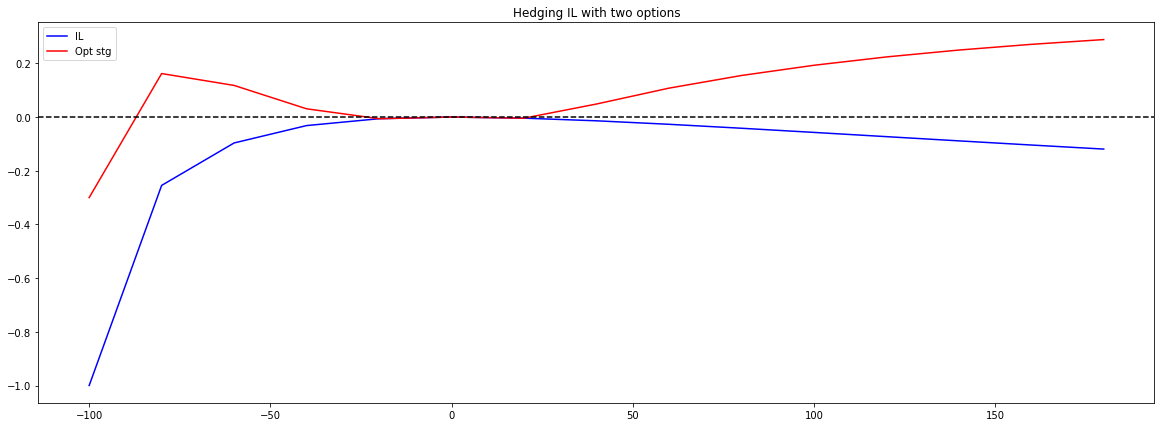

In [16]:

P = P_eth_0*(1+price_change)
K_call = 500
K_put = 280
#
V_hold = balance_usdc + balance_eth * P
V_pool = IL_R(1+price_change) * V_hold
IL_sin_hedge = (V_pool - V_hold) / V_hold
#
opt_stg = [100*long_strangle(p,K_call,K_put) for p in P]
IL_con_hedge = (V_pool + opt_stg - V_hold) / V_hold
#
fig, axs = plt.subplots(1,1,figsize = (20,7))
axs.plot(100*price_change, IL_sin_hedge+1, c = 'blue', label = 'IL')
# axs.plot(P, [call(p,K_call)+put(p,K_put) for p in P], c = 'blue', label = 'long strangle')
axs.plot(100*price_change, IL_con_hedge+1, c = 'red', label = 'Opt stg')
plt.title("Hedging IL with two options")
axs.legend()
axs.axhline(y = 0, color = 'black', linestyle = '--')




### Idea 2: Hedging con combinaciones de Calls y Puts


Debido a las características lineales en el comportamiento de las ganancias frente a los cambios de precios, cuando las opciones están in-the-money, es imposible cubrirse perfectamente contra la IL (que tiene una naturaleza convex)  con solo un tipo de opciones de compra y venta. Sin embargo, con combinaciones de múltiples opciones de compra y venta, podemos encontrar una manera de compensar la IL de manera más efectiva mientras ajustamos los pesos de diferentes opciones con varios precios de ejercicios

In [17]:
def option_combination(P,K_call, K_put):
   call=0
   put=0
   for i in range(len(K_call)):
         call = call + max(P-K_call[i],0)
   for i in range(len(K_put)): 
         put = put + max(K_put[i]-P,0)  
   return call+put


### Estrategia

1. Rango de cobertura de precios: de -60% a +100%;

2. Período de cobertura: 30 días;

3. Opciones de compra: 6 llamadas ETH con precio de ejercicio $480 (+20%), 8 llamadas ETH con precio de ejercicio $520 (+30%), 10 llamadas ETH con precio de ejercicio $560 (+40%);

4. Opciones de venta: 8 opciones de venta de ETH con precio de ejercicio de $360 (-10%), 10 opciones de venta de ETH con precio de ejercicio de $320 (-20%), 15 opciones de venta de ETH con precio de ejercicio de $280 (-30%), 5 opciones de venta de ETH con precio de ejercicio $240 (-40%).



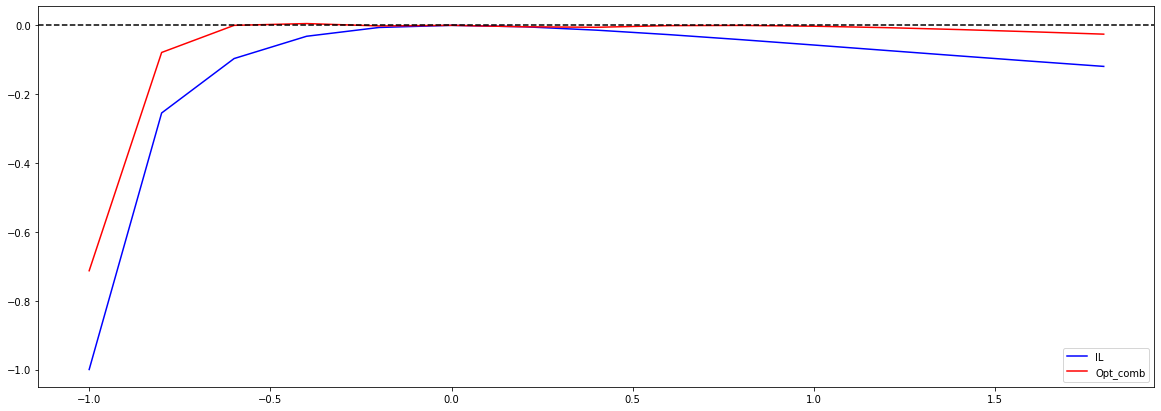

In [18]:
P = P_eth_0*(1+price_change)
K_call = np.concatenate((480*np.ones(6), 520*np.ones(8), 560*np.ones(10)))
K_put = np.concatenate((360*np.ones(8), 320*np.ones(10), 280*np.ones(15), 240*np.ones(5)))
#
V_hold = balance_usdc + balance_eth * P
V_pool = IL_R(1+price_change) * V_hold
IL_sin_hedge = (V_pool - V_hold) / V_hold
#
opt_comb = [option_combination(p,K_call,K_put) for p in P]
IL_con_hedge = (V_pool + opt_comb - V_hold) / V_hold
#
fig, axs = plt.subplots(1,1,figsize = (20,7))
axs.plot(price_change, IL_sin_hedge+1, c = 'blue', label = 'IL')

axs.plot(price_change, IL_con_hedge+1, c = 'red', label = 'Opt_comb')
axs.legend()
axs.axhline(y = 0, color = 'black', linestyle = '--')

### Hedging IL con multiples opciones- conservativo

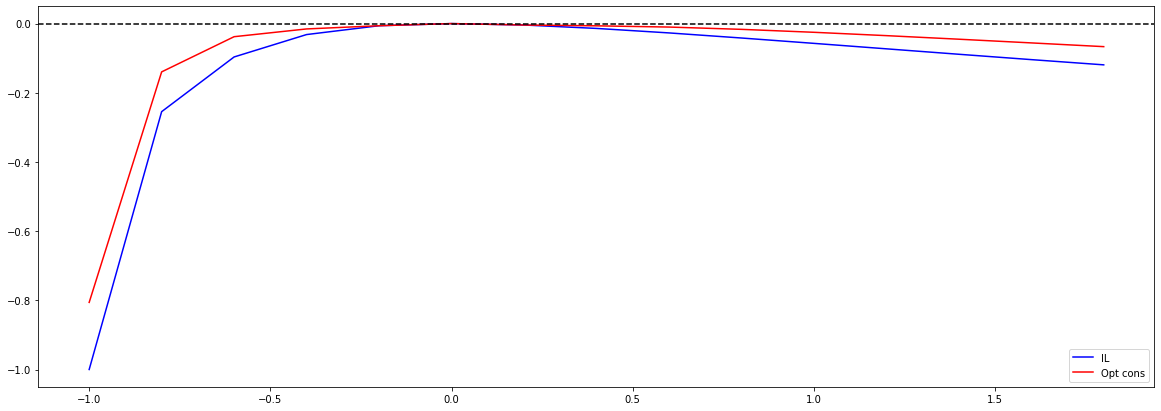

In [20]:
P = P_eth_0*(1+price_change)
K_call = np.concatenate((480*np.ones(5), 520*np.ones(8)))
K_put = np.concatenate((320*np.ones(8), 280*np.ones(10), 240*np.ones(10)))
#
V_hold = balance_usdc + balance_eth * P
V_pool = IL_R(1+price_change) * V_hold
IL_sin_hedge = (V_pool - V_hold) / V_hold
#
opt_comb = [option_combination(p,K_call,K_put) for p in P]
IL_con_hedge = (V_pool + opt_comb - V_hold) / V_hold
#
fig, axs = plt.subplots(1,1,figsize = (20,7))
axs.plot(price_change, IL_sin_hedge+1, c = 'blue', label = 'IL')

axs.plot(price_change, IL_con_hedge+1, c = 'red', label = 'Opt cons')
axs.legend()
axs.axhline(y = 0, color = 'black', linestyle = '--')

### Hedging IL con multiples opciones- agresivo 

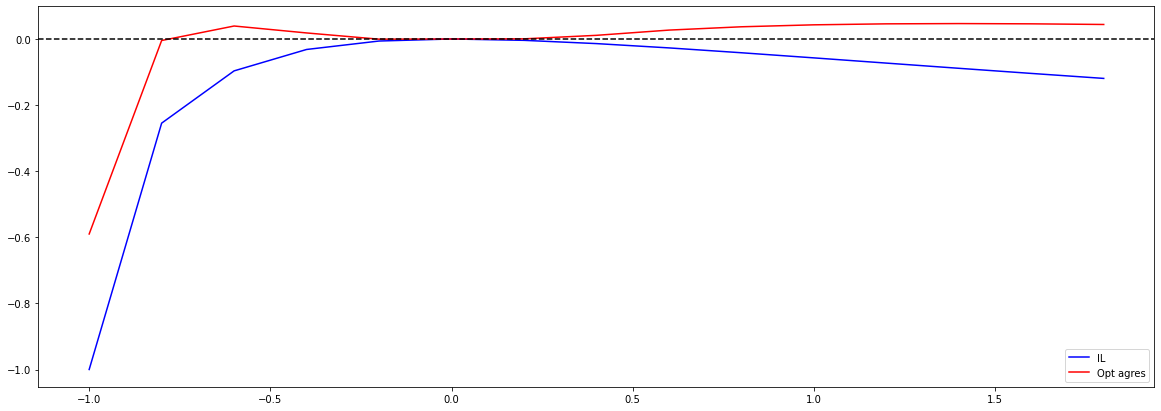

In [21]:
P = P_eth_0*(1+price_change)
K_call = np.concatenate((440*np.ones(10), 480*np.ones(10),520*np.ones(10), 560*np.ones(10)))
K_put = np.concatenate((360*np.ones(10), 320*np.ones(15), 280*np.ones(20), 240*np.ones(10)))
#
V_hold = balance_usdc + balance_eth * P
V_pool = IL_R(1+price_change) * V_hold
IL_sin_hedge = (V_pool - V_hold) / V_hold
#
opt_comb = [option_combination(p,K_call,K_put) for p in P]
IL_con_hedge = (V_pool + opt_comb - V_hold) / V_hold
#
fig, axs = plt.subplots(1,1,figsize = (20,7))
axs.plot(price_change, IL_sin_hedge+1, c = 'blue', label = 'IL')

axs.plot(price_change, IL_con_hedge+1, c = 'red', label = 'Opt agres')
axs.legend()
axs.axhline(y = 0, color = 'black', linestyle = '--')